# load data dan find out masalah di data

In [72]:
import unittest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import io
import sys
import plotly.express as px
from scipy import stats
from scipy.stats import normaltest, ttest_ind, mannwhitneyu

from unittest.mock import patch
from IPython.display import display


plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [73]:
def format_rupiah(x):
    try:
        return f"Rp{int(x):,}".replace(",", ".")
    except:
        return x
    


In [74]:
df = pd.read_csv('urbanmart_sales.csv')
# Format kolom spesifik ke rupiah
df_display = df.copy()

# Ganti nama kolom sesuai dengan yang ada di data Anda
kolom_rupiah = ['Unit_Price', 'Total_Sales']  # Sesuaikan dengan nama kolom yang ada

for col in kolom_rupiah:
    if col in df.columns:
        df_display[col] = df[col].apply(format_rupiah)
        print(f"✓ Kolom {col} berhasil diformat ke rupiah")
    else:
        print(f"❌ Kolom {col} tidak ditemukan")

display(df_display.head(10))

✓ Kolom Unit_Price berhasil diformat ke rupiah
✓ Kolom Total_Sales berhasil diformat ke rupiah


,Transaction_ID,Date,Customer_ID,Gender,Age,City,Product_Category,Product_Name,Quantity,Unit_Price,Discount(%),Payment_Method,Total_Sales,Rating
0,T0001,2025-03-13,C189,Male,56,Bandung,Home Appliances,Air Fryer Go,5,Rp1.429.414,10,Cash,Rp6.432.363,3.6
1,T0002,2025-05-11,C150,Male,19,Medan,Home Appliances,Iron SteamX,4,Rp1.254.911,15,E-Wallet,Rp4.266.697,3.8
2,T0003,2025-11-10,C022,Male,42,Jakarta,Food & Beverage,Instant Noodles,5,Rp88.104,15,Cash,Rp374.442,4.4
3,T0004,2025-07-09,C190,Male,20,Yogyakarta,Fashion,T-Shirt Basic,4,Rp663.143,10,Cash,Rp2.387.314,4.5
4,T0005,2025-01-14,C009,Female,19,Medan,Electronics,Smartwatch Z3,4,Rp1.334.512,15,Transfer,Rp4.537.340,4.2
5,T0006,2025-02-04,C081,Female,57,Medan,Home Appliances,Air Fryer Go,5,Rp818.591,10,E-Wallet,Rp3.683.659,4.1
6,T0007,2025-07-10,C146,Female,51,Bandung,Fashion,Sneakers X-Fit,4,Rp1.235.405,0,E-Wallet,Rp4.941.620,4.9
7,T0008,2025-08-01,C082,Male,41,Bandung,Home Appliances,Air Fryer Go,1,Rp1.022.293,15,Credit Card,Rp868.949,3.9
8,T0009,2025-10-28,C065,Male,24,Jakarta,Food & Beverage,Chocolate Bar,1,Rp43.044,10,Transfer,Rp38.739,4.1
9,T0010,2025-06-12,C163,Male,22,Bandung,Food & Beverage,Mineral Water 1L,3,Rp44.504,15,Cash,Rp113.485,4.5


## Find out data error atau missing

In [75]:
print(f"Shape: {df_display.shape}")
print(f"Columns: {df_display.columns.tolist()}")
print(f"\nData types:")
print(df_display.dtypes)
print(f"\nSample data:")
display(df_display.head())

Shape: (500, 14)
Columns: ['Transaction_ID', 'Date', 'Customer_ID', 'Gender', 'Age', 'City', 'Product_Category', 'Product_Name', 'Quantity', 'Unit_Price', 'Discount(%)', 'Payment_Method', 'Total_Sales', 'Rating']

Data types:
Transaction_ID       object
Date                 object
Customer_ID          object
Gender               object
Age                   int64
City                 object
Product_Category     object
Product_Name         object
Quantity              int64
Unit_Price           object
Discount(%)           int64
Payment_Method       object
Total_Sales          object
Rating              float64
dtype: object

Sample data:


,Transaction_ID,Date,Customer_ID,Gender,Age,City,Product_Category,Product_Name,Quantity,Unit_Price,Discount(%),Payment_Method,Total_Sales,Rating
0,T0001,2025-03-13,C189,Male,56,Bandung,Home Appliances,Air Fryer Go,5,Rp1.429.414,10,Cash,Rp6.432.363,3.6
1,T0002,2025-05-11,C150,Male,19,Medan,Home Appliances,Iron SteamX,4,Rp1.254.911,15,E-Wallet,Rp4.266.697,3.8
2,T0003,2025-11-10,C022,Male,42,Jakarta,Food & Beverage,Instant Noodles,5,Rp88.104,15,Cash,Rp374.442,4.4
3,T0004,2025-07-09,C190,Male,20,Yogyakarta,Fashion,T-Shirt Basic,4,Rp663.143,10,Cash,Rp2.387.314,4.5
4,T0005,2025-01-14,C009,Female,19,Medan,Electronics,Smartwatch Z3,4,Rp1.334.512,15,Transfer,Rp4.537.340,4.2


In [76]:
# Missing value
missing_info = df_display.isnull().sum()
missing_pct = (missing_info / len(df_display)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_info,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Count', ascending=False)

missing_summary

,Missing_Count,Missing_Percentage
Transaction_ID,0,0.0
Date,0,0.0
Customer_ID,0,0.0
Gender,0,0.0
Age,0,0.0
City,0,0.0
Product_Category,0,0.0
Product_Name,0,0.0
Quantity,0,0.0
Unit_Price,0,0.0


In [77]:
for col in df_display.columns:
    if df_display[col].dtype == 'object':
        unique_count = df_display[col].nunique()
        unique_values = df_display[col].dropna().unique()  # Remove NaN dan ambil semua unique values
        print(f"{col}: {unique_count} unique values")
        print(f"  All unique values: {unique_values}")
        print()

Transaction_ID: 500 unique values
  All unique values: ['T0001' 'T0002' 'T0003' 'T0004' 'T0005' 'T0006' 'T0007' 'T0008' 'T0009'
 'T0010' 'T0011' 'T0012' 'T0013' 'T0014' 'T0015' 'T0016' 'T0017' 'T0018'
 'T0019' 'T0020' 'T0021' 'T0022' 'T0023' 'T0024' 'T0025' 'T0026' 'T0027'
 'T0028' 'T0029' 'T0030' 'T0031' 'T0032' 'T0033' 'T0034' 'T0035' 'T0036'
 'T0037' 'T0038' 'T0039' 'T0040' 'T0041' 'T0042' 'T0043' 'T0044' 'T0045'
 'T0046' 'T0047' 'T0048' 'T0049' 'T0050' 'T0051' 'T0052' 'T0053' 'T0054'
 'T0055' 'T0056' 'T0057' 'T0058' 'T0059' 'T0060' 'T0061' 'T0062' 'T0063'
 'T0064' 'T0065' 'T0066' 'T0067' 'T0068' 'T0069' 'T0070' 'T0071' 'T0072'
 'T0073' 'T0074' 'T0075' 'T0076' 'T0077' 'T0078' 'T0079' 'T0080' 'T0081'
 'T0082' 'T0083' 'T0084' 'T0085' 'T0086' 'T0087' 'T0088' 'T0089' 'T0090'
 'T0091' 'T0092' 'T0093' 'T0094' 'T0095' 'T0096' 'T0097' 'T0098' 'T0099'
 'T0100' 'T0101' 'T0102' 'T0103' 'T0104' 'T0105' 'T0106' 'T0107' 'T0108'
 'T0109' 'T0110' 'T0111' 'T0112' 'T0113' 'T0114' 'T0115' 'T0116' 'T01

In [78]:
df_display.describe()

,Age,Quantity,Discount(%),Rating
count,500.000000,500.000000,500.000000,500.000000
mean,38.714000,3.154000,7.810000,4.228400
std,11.865318,1.422086,5.728834,0.428673
min,18.000000,1.000000,0.000000,3.500000
25%,29.000000,2.000000,5.000000,3.800000
50%,38.000000,3.000000,10.000000,4.200000
75%,50.000000,4.000000,15.000000,4.600000
max,59.000000,5.000000,15.000000,5.000000


## Information
- df: dataframe utama
- df_display: dataframe untuk display (setelah cleaning)

# Task 2
- Ada 2 User Request
1. Kategori produk mana yang memberikan total penjualan (Total_Sales) tertinggi selama periode analisis?
2. Kota mana yang menghasilkan rata-rata penjualan tertinggi per transaksi?

Jelaskan langkah-langkah yang akan Anda ambil untuk menjawab pertanyaan-pertanyaan ini, termasuk metode analisis data yang akan Anda gunakan. Dan visualisasi apa yang akan Anda buat untuk mendukung temuan Anda?

,Rank,Product_Category,Total_Sales_Formatted
0,1,Electronics,Rp304.079.535
1,2,Home Appliances,Rp277.016.478
2,3,Fashion,Rp213.649.520
3,4,Food & Beverage,Rp20.196.512



Total revenue keseluruhan: Rp814.942.046
Kategori teratas: Electronics (37.3%)


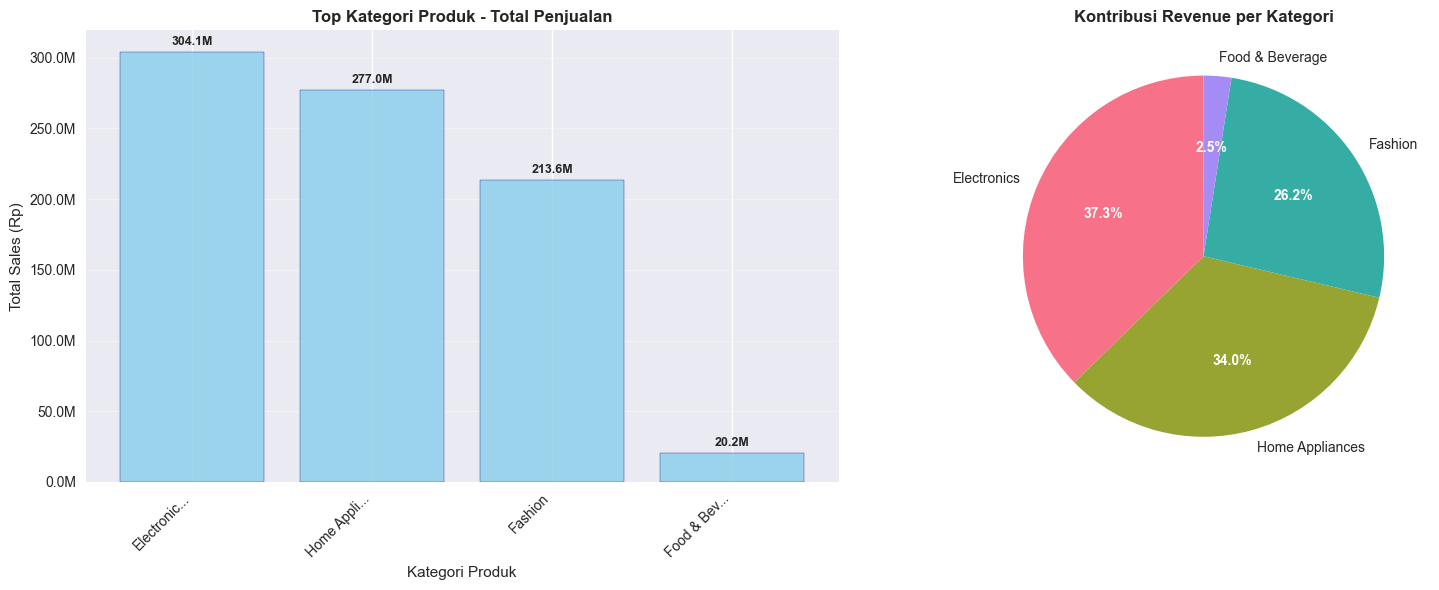

In [79]:
# PERTANYAAN 1: Kategori produk dengan total penjualan tertinggi + VISUALISASI

# Analisis kategori sales
kategori_sales = (
    df.groupby('Product_Category')['Total_Sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

kategori_display = kategori_sales.copy()
kategori_display['Total_Sales_Formatted'] = kategori_display['Total_Sales'].apply(format_rupiah)
kategori_display['Rank'] = range(1, len(kategori_display) + 1)

display(kategori_display[['Rank', 'Product_Category', 'Total_Sales_Formatted']])

# Hitung persentase kontribusi
total_revenue = kategori_sales['Total_Sales'].sum()
kategori_display['Percentage'] = (kategori_sales['Total_Sales'] / total_revenue * 100).round(2)

print(f"\nTotal revenue keseluruhan: {format_rupiah(total_revenue)}")
print(f"Kategori teratas: {kategori_sales.iloc[0]['Product_Category']} ({kategori_display.iloc[0]['Percentage']:.1f}%)")

# Visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#Bar Chart Total Sales per Kategori
top_categories = kategori_sales.head(10)
bars1 = ax1.bar(range(len(top_categories)), top_categories['Total_Sales'], 
                color='skyblue', alpha=0.8, edgecolor='navy')
ax1.set_xlabel('Kategori Produk')
ax1.set_ylabel('Total Sales (Rp)')
ax1.set_title('Top Kategori Produk - Total Penjualan', fontweight='bold')
ax1.set_xticks(range(len(top_categories)))
ax1.set_xticklabels([cat[:10] + '...' if len(cat) > 10 else cat 
                    for cat in top_categories['Product_Category']], rotation=45, ha='right')

# Format y-axis ke jutaan
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000000:.1f}M'))

# Tambahkan nilai di atas bar
for i, (bar, value) in enumerate(zip(bars1, top_categories['Total_Sales'])):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(top_categories['Total_Sales'])*0.01,
             f'{value/1000000:.1f}M', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax1.grid(axis='y', alpha=0.3)

# Pie Chart Kontribusi Kategori (Top 5)
top5_categories = kategori_sales.head(5)
others_value = kategori_sales[5:]['Total_Sales'].sum() if len(kategori_sales) > 5 else 0

pie_data = list(top5_categories['Total_Sales']) + ([others_value] if others_value > 0 else [])
pie_labels = list(top5_categories['Product_Category']) + (['Others'] if others_value > 0 else [])

colors = sns.color_palette("husl", len(pie_data))
wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%', 
                                  startangle=90, colors=colors)
ax2.set_title('Kontribusi Revenue per Kategori', fontweight='bold')

# Styling pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

,Rank,City,mean_formatted,Total_Transactions,sum_formatted
0,1,Jakarta,Rp1.912.012,115,Rp219.881.484
1,2,Bandung,Rp1.800.784,104,Rp187.281.583
2,3,Medan,Rp1.718.381,92,Rp158.091.091
3,4,Yogyakarta,Rp1.321.268,99,Rp130.805.578
4,5,Surabaya,Rp1.320.914,90,Rp118.882.309



Kota dengan rata-rata penjualan tertinggi: Jakarta
Rata-rata per transaksi: Rp1.912.012


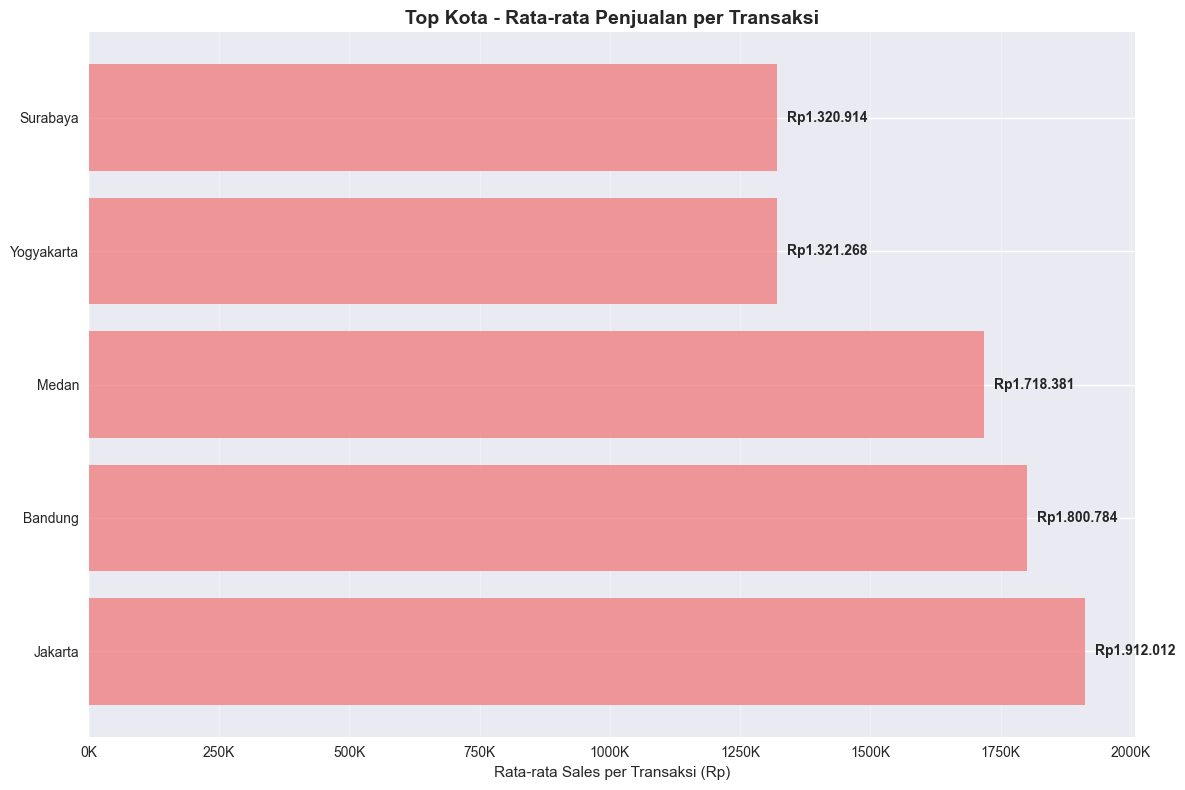

In [80]:
# Analisis rata-rata sales per kota
kota_avg_sales = (
    df.groupby('City')['Total_Sales']
    .agg(['mean', 'count', 'sum'])
    .round(2)
    .sort_values('mean', ascending=False)
    .reset_index()
)

# Format untuk display
kota_display = kota_avg_sales.copy()
kota_display['mean_formatted'] = kota_display['mean'].apply(format_rupiah)
kota_display['sum_formatted'] = kota_display['sum'].apply(format_rupiah)
kota_display['Rank'] = range(1, len(kota_display) + 1)

# Rename kolom untuk clarity
kota_display = kota_display.rename(columns={
    'mean': 'Avg_Sales_per_Transaction',
    'count': 'Total_Transactions', 
    'sum': 'Total_Revenue'
})

display(kota_display[['Rank', 'City', 'mean_formatted', 'Total_Transactions', 'sum_formatted']])

print(f"\nKota dengan rata-rata penjualan tertinggi: {kota_avg_sales.iloc[0]['City']}")
print(f"Rata-rata per transaksi: {format_rupiah(kota_avg_sales.iloc[0]['mean'])}")

# VISUALISASI PERTANYAAN 2 - Bar Chart saja
plt.figure(figsize=(12, 8))

top_cities = kota_avg_sales.head(10)
bars = plt.barh(range(len(top_cities)), top_cities['mean'], color='lightcoral', alpha=0.8)

plt.yticks(range(len(top_cities)), top_cities['City'])
plt.xlabel('Rata-rata Sales per Transaksi (Rp)')
plt.title('Top Kota - Rata-rata Penjualan per Transaksi', fontweight='bold', fontsize=14)

# Format x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Tambahkan nilai di ujung bar
for i, (bar, value) in enumerate(zip(bars, top_cities['mean'])):
    plt.text(bar.get_width() + max(top_cities['mean'])*0.01, 
             bar.get_y() + bar.get_height()/2,
             format_rupiah(value), va='center', fontweight='bold', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Task 3
- Apakah terdapat perbedaan signifikan rata-rata pembelian antara gender (Male vs Female)?
- Apakah diskon yang lebih besar berpengaruh terhadap total penjualan (Total_Sales)?
- Metode pembayaran apa yang paling populer di setiap kota?

In [ ]:
# Perbedaan rata-rata pembelian antara gender

# Filter data Male dan Female
male_data = df[df['Gender'] == 'Male']['Total_Sales']
female_data = df[df['Gender'] == 'Female']['Total_Sales']

print(f"Jumlah data Male: {len(male_data)}")
print(f"Jumlah data Female: {len(female_data)}")

# Statistik deskriptif
gender_stats = df.groupby('Gender')['Total_Sales'].agg(['count', 'mean', 'median', 'std']).round(2)
gender_stats['mean_formatted'] = gender_stats['mean'].apply(format_rupiah)
gender_stats['median_formatted'] = gender_stats['median'].apply(format_rupiah)
gender_stats['std_formatted'] = gender_stats['std'].apply(format_rupiah)

# TABEL 1: Statistik Gender
display(gender_stats[['count', 'mean_formatted', 'median_formatted', 'std_formatted']])

print(f"Male - Mean: {format_rupiah(male_data.mean())}, Median: {format_rupiah(male_data.median())}")
print(f"Female - Mean: {format_rupiah(female_data.mean())}, Median: {format_rupiah(female_data.median())}")

# Test normalitas
male_normal_stat, male_normal_p = normaltest(male_data)
female_normal_stat, female_normal_p = normaltest(female_data)

print(f"Male - Normal test p-value: {male_normal_p:.6f}")
print(f"Female - Normal test p-value: {female_normal_p:.6f}")

alpha = 0.05
male_normal = male_normal_p > alpha
female_normal = female_normal_p > alpha

print(f"Male data normal: {male_normal}")
print(f"Female data normal: {female_normal}")

# Pilih test yang sesuai
print(f"\n=== UJI PERBEDAAN ===")
if male_normal and female_normal:
    # Gunakan t-test jika kedua data normal
    stat, p_value = ttest_ind(male_data, female_data)
    test_name = "Independent T-Test"
else:
    # Gunakan Mann-Whitney U test jika data tidak normal
    stat, p_value = mannwhitneyu(male_data, female_data, alternative='two-sided')
    test_name = "Mann-Whitney U Test"

print(f"Test yang digunakan: {test_name}")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < alpha:
    print(f"✓ Ada perbedaan signifikan rata-rata pembelian antara gender (p < {alpha})")
else:
    print(f"✗ Tidak ada perbedaan signifikan rata-rata pembelian antara gender (p >= {alpha})")

Jumlah data Male: 246
Jumlah data Female: 254

=== STATISTIK DESKRIPTIF ===


,count,mean_formatted,median_formatted,std_formatted
Gender,,,,
Female,254,Rp1.606.159,Rp842.609,Rp1.772.668
Male,246,Rp1.654.380,Rp1.127.367,Rp1.619.759


Male - Mean: Rp1.654.380, Median: Rp1.127.367
Female - Mean: Rp1.606.159, Median: Rp842.609

=== UJI NORMALITAS ===
Male - Normal test p-value: 0.000000
Female - Normal test p-value: 0.000000
Male data normal: False
Female data normal: False

=== UJI PERBEDAAN ===
Test yang digunakan: Mann-Whitney U Test
Statistic: 33084.0000
P-value: 0.254227
✗ Tidak ada perbedaan signifikan rata-rata pembelian antara gender (p >= 0.05)


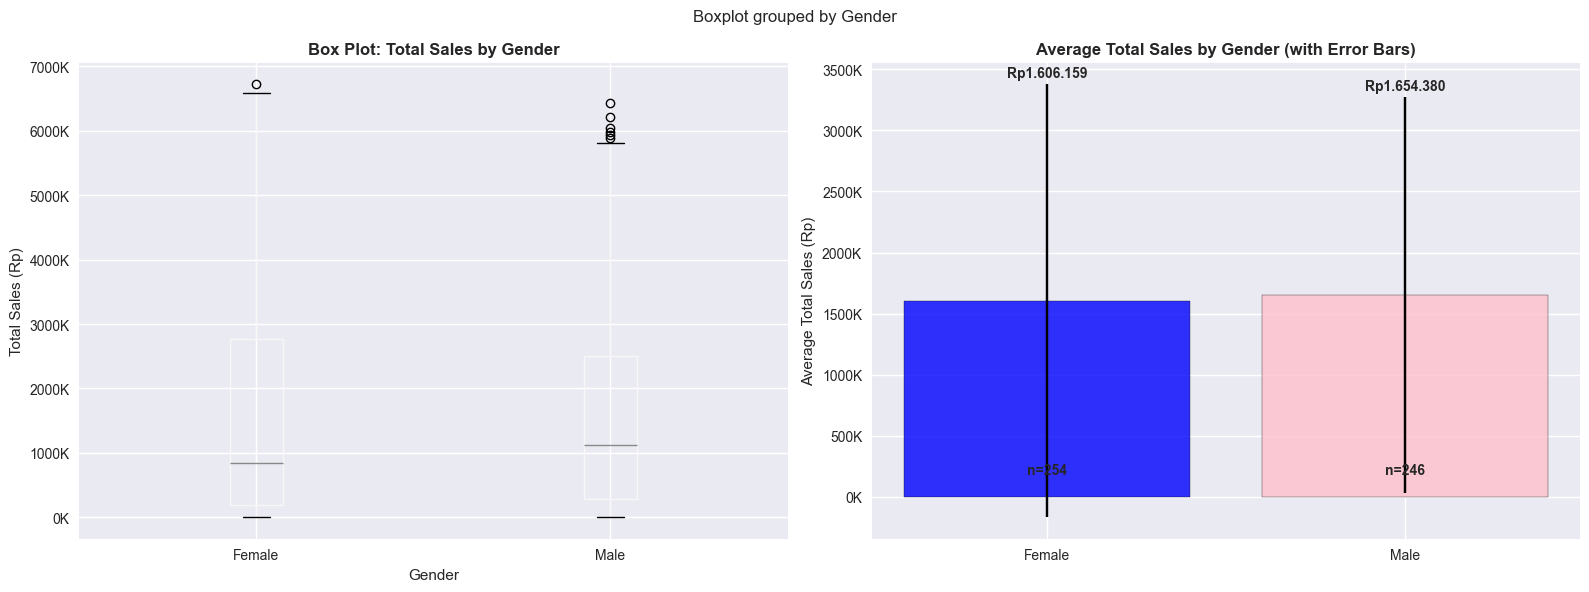

In [82]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Box Plot
df.boxplot(column='Total_Sales', by='Gender', ax=ax1)
ax1.set_title('Box Plot: Total Sales by Gender', fontweight='bold')
ax1.set_ylabel('Total Sales (Rp)')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
ax1.set_xlabel('Gender')

# Bar Plot dengan Error Bars
gender_mean = df.groupby('Gender')['Total_Sales'].mean()
gender_std = df.groupby('Gender')['Total_Sales'].std()

bars = ax2.bar(gender_mean.index, gender_mean.values, 
               yerr=gender_std.values, capsize=5, 
               alpha=0.8, color=['blue', 'pink'], 
               edgecolor='black')

ax2.set_ylabel('Average Total Sales (Rp)')
ax2.set_title('Average Total Sales by Gender (with Error Bars)', fontweight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# TAMBAHKAN NILAI DI ATAS BARS
for i, (bar, value) in enumerate(zip(bars, gender_mean.values)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + gender_std.iloc[i] + max(gender_mean)*0.02,
             format_rupiah(value), ha='center', va='bottom', fontweight='bold')

# TAMBAHKAN JUMLAH DATA DI BAWAH BARS
for i, gender in enumerate(gender_mean.index):
    count = len(df[df['Gender'] == gender])
    ax2.text(i, max(gender_mean)*0.1, f'n={count}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

In [83]:
# Korelasi antara diskon dan total sales
correlation = df['Discount(%)'].corr(df['Total_Sales'])
print(f"Korelasi diskon vs total sales: {correlation:.4f}")

# Kategorikan diskon
df['Discount_Category'] = pd.cut(df['Discount(%)'], 
                                bins=[0, 10, 20, 30, 100], 
                                labels=['Low (0-10%)', 'Medium (10-20%)', 'High (20-30%)', 'Very High (>30%)'])

#Analisis per kategori diskon
discount_analysis = df.groupby('Discount_Category')['Total_Sales'].agg(['count', 'mean', 'median', 'std']).round(2)
discount_analysis['mean_formatted'] = discount_analysis['mean'].apply(format_rupiah)
discount_analysis['median_formatted'] = discount_analysis['median'].apply(format_rupiah)
discount_analysis['std_formatted'] = discount_analysis['std'].apply(format_rupiah)

print(f"\n=== TABEL 2: ANALISIS PER KATEGORI DISKON ===")
display(discount_analysis[['count', 'mean_formatted', 'median_formatted', 'std_formatted']])

# Test normalitas untuk setiap kategori
print(f"\n=== UJI NORMALITAS PER KATEGORI DISKON ===")
categories = df['Discount_Category'].dropna().unique()

for cat in categories:
    cat_data = df[df['Discount_Category'] == cat]['Total_Sales']
    if len(cat_data) > 8:  # normaltest needs at least 8 observations
        stat, p_value = normaltest(cat_data)
        print(f"{cat}: p-value = {p_value:.6f}, Normal = {p_value > 0.05}")
    else:
        print(f"{cat}: Tidak cukup data untuk uji normalitas")

Korelasi diskon vs total sales: -0.1161

=== TABEL 2: ANALISIS PER KATEGORI DISKON ===


C:\Users\AUDIT-PC\AppData\Local\Temp\ipykernel_4972\692070950.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_analysis = df.groupby('Discount_Category')['Total_Sales'].agg(['count', 'mean', 'median', 'std']).round(2)


,count,mean_formatted,median_formatted,std_formatted
Discount_Category,,,,
Low (0-10%),234,Rp1.613.619,Rp996.485,Rp1.700.349
Medium (10-20%),144,Rp1.362.533,Rp658.839,Rp1.579.566
High (20-30%),0,NaN,NaN,NaN
Very High (>30%),0,NaN,NaN,NaN



=== UJI NORMALITAS PER KATEGORI DISKON ===
Low (0-10%): p-value = 0.000000, Normal = False
Medium (10-20%): p-value = 0.000000, Normal = False


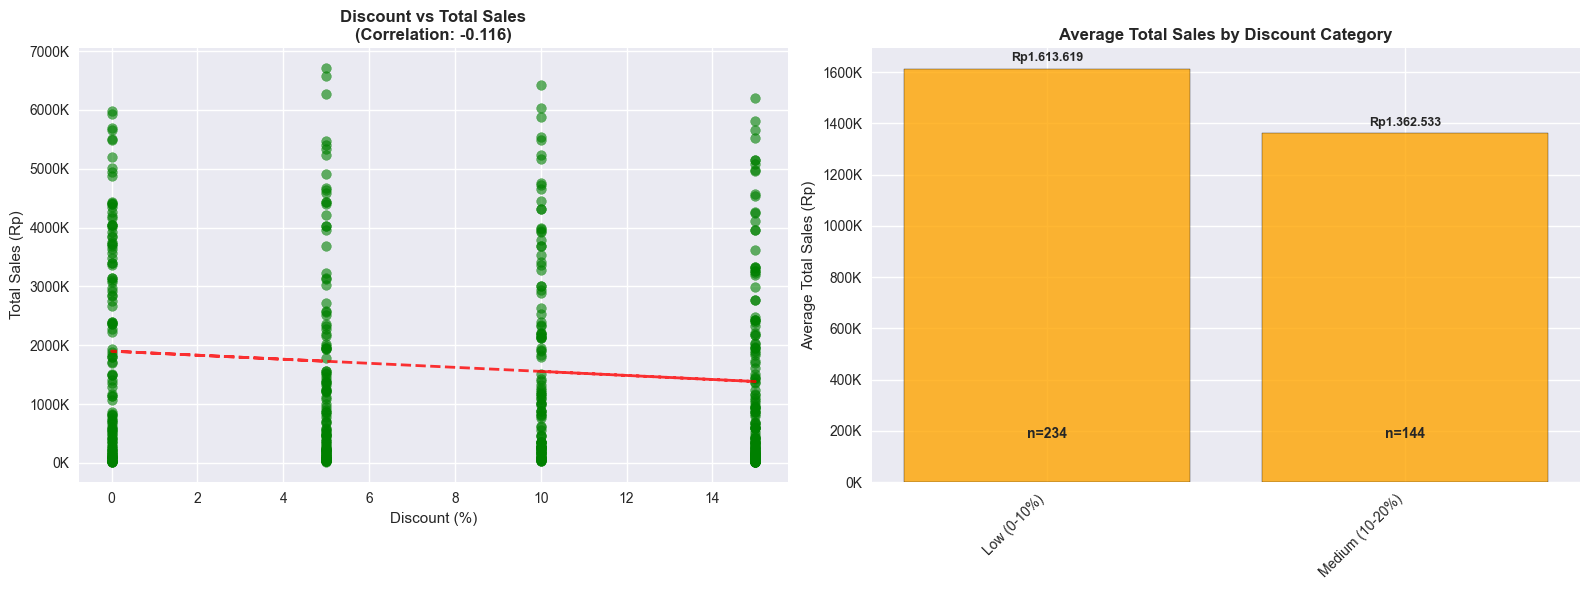

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#  Scatter Plot diskon vs total sales
ax1.scatter(df['Discount(%)'], df['Total_Sales'], alpha=0.6, color='green')
ax1.set_xlabel('Discount (%)')
ax1.set_ylabel('Total Sales (Rp)')
ax1.set_title(f'Discount vs Total Sales\n(Correlation: {correlation:.3f})', fontweight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Add trend line
z = np.polyfit(df['Discount(%)'], df['Total_Sales'], 1)
p = np.poly1d(z)
ax1.plot(df['Discount(%)'], p(df['Discount(%)']), "r--", alpha=0.8, linewidth=2)

# Bar plot rata-rata per kategori diskon
discount_analysis_clean = discount_analysis.dropna()
bars = ax2.bar(range(len(discount_analysis_clean)), discount_analysis_clean['mean'], 
               alpha=0.8, color='orange', edgecolor='black')

ax2.set_xticks(range(len(discount_analysis_clean)))
ax2.set_xticklabels(discount_analysis_clean.index, rotation=45, ha='right')
ax2.set_ylabel('Average Total Sales (Rp)')
ax2.set_title('Average Total Sales by Discount Category', fontweight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

for i, (bar, value) in enumerate(zip(bars, discount_analysis_clean['mean'])):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(discount_analysis_clean['mean'])*0.01,
             format_rupiah(value), ha='center', va='bottom', fontweight='bold', fontsize=9)

for i, cat in enumerate(discount_analysis_clean.index):
    count = discount_analysis_clean.loc[cat, 'count']
    ax2.text(i, max(discount_analysis_clean['mean'])*0.1, f'n={count}', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

In [85]:
# Analisis metode pembayaran per kota
payment_by_city = df.groupby(['City', 'Payment_Method']).size().reset_index(name='Count')

# Cari metode pembayaran paling populer per kota
most_popular_payment = payment_by_city.loc[payment_by_city.groupby('City')['Count'].idxmax()]
most_popular_payment = most_popular_payment.sort_values('Count', ascending=False)

# Metode pembayaran paling populer per kota
display(most_popular_payment[['City', 'Payment_Method', 'Count']].head(10))

# Pivot table untuk heatmap
payment_pivot = df.pivot_table(values='Customer_ID', 
                              index='City', 
                              columns='Payment_Method', 
                              aggfunc='count', 
                              fill_value=0)

# Overall popularity
overall_payment = df['Payment_Method'].value_counts()
print(f"\nPOPULARITAS METODE PEMBAYARAN SECARA KESELURUHAN")
for method, count in overall_payment.items():
    pct = (count / len(df)) * 100
    print(f"{method}: {count} transaksi ({pct:.1f}%)")

,City,Payment_Method,Count
5,Jakarta,Credit Card,34
17,Yogyakarta,Credit Card,29
1,Bandung,Credit Card,28
12,Surabaya,Cash,28
9,Medan,Credit Card,25



POPULARITAS METODE PEMBAYARAN SECARA KESELURUHAN
Credit Card: 134 transaksi (26.8%)
Cash: 122 transaksi (24.4%)
E-Wallet: 122 transaksi (24.4%)
Transfer: 122 transaksi (24.4%)


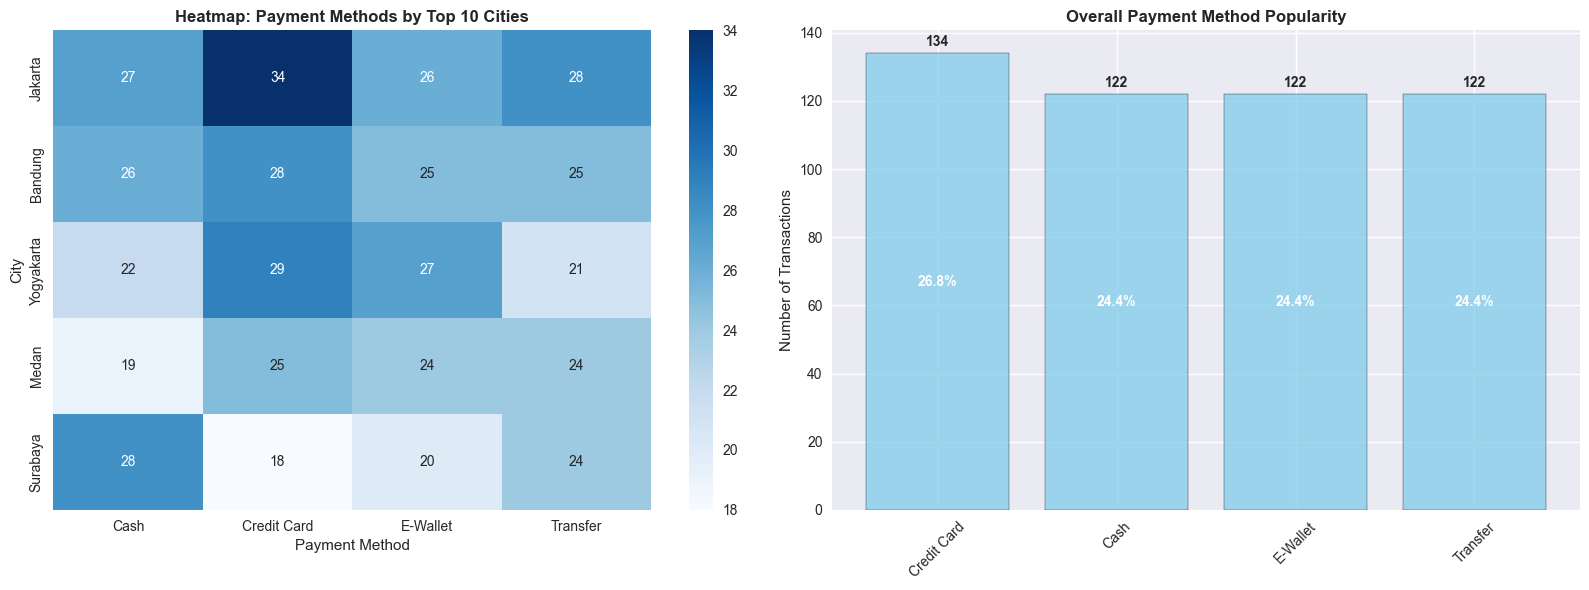

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap metode pembayaran per kota (top 10 kota)
top_cities = df['City'].value_counts().head(10).index
payment_pivot_top = payment_pivot.loc[top_cities]

sns.heatmap(payment_pivot_top, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Heatmap: Payment Methods by Top 10 Cities', fontweight='bold')
ax1.set_xlabel('Payment Method')
ax1.set_ylabel('City')

# Bar plot overall popularity
bars = ax2.bar(overall_payment.index, overall_payment.values, 
               color='skyblue', alpha=0.8, edgecolor='black')
ax2.set_title('Overall Payment Method Popularity', fontweight='bold')
ax2.set_ylabel('Number of Transactions')
ax2.tick_params(axis='x', rotation=45)

for i, (bar, value) in enumerate(zip(bars, overall_payment.values)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(overall_payment.values)*0.01,
             str(value), ha='center', va='bottom', fontweight='bold')

for i, (method, value) in enumerate(overall_payment.items()):
    pct = (value / len(df)) * 100
    ax2.text(i, value/2, f'{pct:.1f}%', 
             ha='center', va='center', fontweight='bold', color='white', fontsize=10)

plt.tight_layout()
plt.show()

In [88]:

print("=== KESIMPULAN TASK 3 ===")

print(f"\n📊 JAWABAN PERTANYAAN 1:")
print(f"✓ Test yang digunakan: {test_name}")
if p_value < 0.05:
    print(f"✓ Ada perbedaan signifikan rata-rata pembelian antara gender")
    print(f"✓ Male: {format_rupiah(male_data.mean())}, Female: {format_rupiah(female_data.mean())}")
else:
    print(f"✓ Tidak ada perbedaan signifikan rata-rata pembelian antara gender")

print(f"\n💰 JAWABAN PERTANYAAN 2:")
print(f"✓ Korelasi diskon vs total sales: {correlation:.4f}")
if abs(correlation) > 0.3:
    direction = "positif" if correlation > 0 else "negatif"
    print(f"✓ Ada korelasi {direction} yang cukup kuat antara diskon dan total sales")
else:
    print(f"✓ Korelasi antara diskon dan total sales lemah")

print(f"\n💳 JAWABAN PERTANYAAN 3:")
print(f"✓ Metode pembayaran paling populer: {overall_payment.index[0]} ({overall_payment.iloc[0]} transaksi)")
print(f"✓ Kota dengan transaksi terbanyak menggunakan {overall_payment.index[0]}: {most_popular_payment.iloc[0]['City']}")

print(f"\n📈 METODOLOGI:")
print(f"✓ Uji normalitas menggunakan D'Agostino's normality test")
print(f"✓ Pemilihan test statistik berdasarkan distribusi data")
print(f"✓ Analisis korelasi untuk hubungan linear")
print(f"✓ Kategorisasi data untuk analisis yang lebih meaningful")

=== KESIMPULAN TASK 3 ===

📊 JAWABAN PERTANYAAN 1:
✓ Test yang digunakan: Mann-Whitney U Test
✓ Ada perbedaan signifikan rata-rata pembelian antara gender
✓ Male: Rp1.654.380, Female: Rp1.606.159

💰 JAWABAN PERTANYAAN 2:
✓ Korelasi diskon vs total sales: -0.1161
✓ Korelasi antara diskon dan total sales lemah

💳 JAWABAN PERTANYAAN 3:
✓ Metode pembayaran paling populer: Credit Card (134 transaksi)
✓ Kota dengan transaksi terbanyak menggunakan Credit Card: Jakarta

📈 METODOLOGI:
✓ Uji normalitas menggunakan D'Agostino's normality test
✓ Pemilihan test statistik berdasarkan distribusi data
✓ Analisis korelasi untuk hubungan linear
✓ Kategorisasi data untuk analisis yang lebih meaningful
